# Emotion Classification Using Decision Tree: Train, Validation, and Test Evaluation

In this Colab notebook, we employ a **Decision Tree Classifier** to classify emotions in a balanced, augmented dataset. The dataset is divided into **training**, **validation**, and **testing** subsets to ensure robust evaluation of the model's performance on unseen data.

### Key Highlights:
1. **Dataset Splitting:**
   - The dataset is divided into training (60%), validation (20%), and testing (20%) subsets.
   - Training data is used to train the Decision Tree model, validation data to check interim performance, and test data to assess final performance.

2. **Text Vectorization:**
   - Textual data is transformed into numerical features using **TF-IDF Vectorization**.

3. **Model Training and Evaluation:**
   - Decision Tree Classifier is trained with default parameters.
   - Performance is evaluated on:
     - Training data: To verify the model's ability to learn.
     - Validation data: To check its generalization capability.
     - Test data: To measure performance on unseen examples.

4. **Confusion Matrix Analysis:**
   - A confusion matrix visualizes the model's predictions on the test set, offering insights into its classification strengths and weaknesses.




Training Accuracy: 0.9848066298342542
Classification Report on Training Data:
               precision    recall  f1-score   support

       anger       0.99      0.99      0.99     12530
     boredom       1.00      0.99      0.99      9899
   confusion       0.99      0.99      0.99     12650
     disgust       0.99      0.99      0.99     13763
        fear       0.99      0.99      0.99     13012
       guilt       0.98      0.98      0.98     13678
         joy       0.94      0.98      0.96     16533
     neutral       0.99      0.98      0.99     12356
     sadness       0.99      0.97      0.98     14313
       shame       0.99      0.98      0.99     12923
    surprise       1.00      0.99      1.00     10247

    accuracy                           0.98    141904
   macro avg       0.99      0.99      0.99    141904
weighted avg       0.99      0.98      0.98    141904


Validation Accuracy: 0.6672797615272404
Classification Report on Validation Data:
               precision

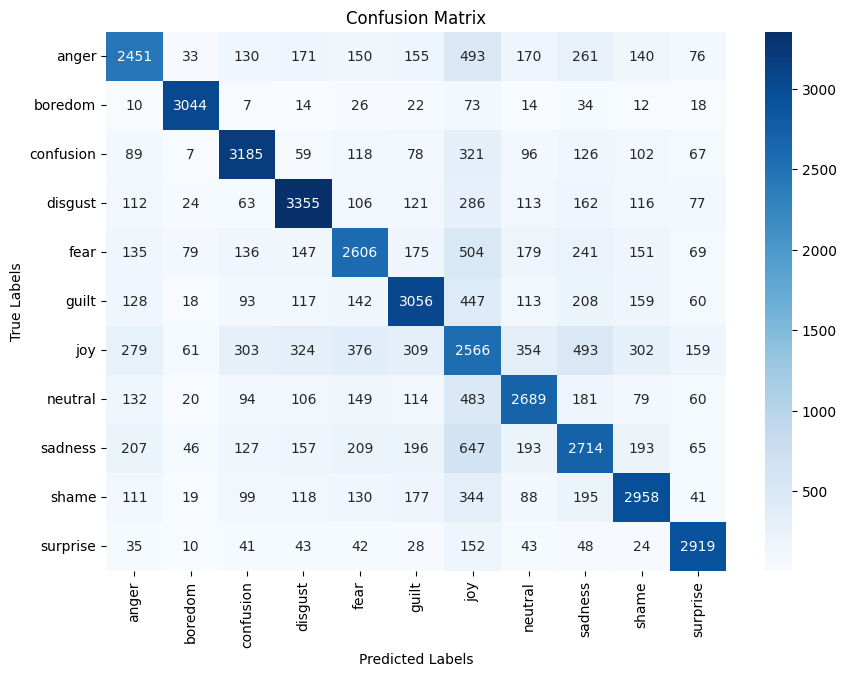

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Load the augmented dataset
# Purpose: Load the dataset containing balanced text data and emotion labels.
df = pd.read_csv('Augmented_Emotion_Dataset.csv')

# Step 2: Split the dataset into features (X) and labels (y)
# X: Cleaned text data
# y: Emotion labels
X = df['cleaned_text']
y = df['EMOTION']

# Step 3: Split into train, validation, and test sets (60%-20%-20%)
# Purpose: Divide the dataset into training, validation, and testing subsets.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 4: Vectorize the text data using TF-IDF
# Purpose: Transform text data into numerical feature vectors for machine learning input.
tfidf = TfidfVectorizer(max_features=5000)  # Maximum number of features set to 5000
X_train_tfidf = tfidf.fit_transform(X_train)  # Fit and transform training data
X_val_tfidf = tfidf.transform(X_val)         # Transform validation data
X_test_tfidf = tfidf.transform(X_test)       # Transform testing data

# Step 5: Train the Decision Tree model
# Purpose: Train a Decision Tree Classifier on the TF-IDF-transformed training data.
dt_model = DecisionTreeClassifier(random_state=42)  # Initialize the Decision Tree model
dt_model.fit(X_train_tfidf, y_train)  # Train the model

# Step 6: Evaluate the model on the training set
# Purpose: Measure the model's learning performance on the training data.
y_train_pred = dt_model.predict(X_train_tfidf)  # Predict on training data
train_accuracy = accuracy_score(y_train, y_train_pred)  # Calculate training accuracy
print("\nTraining Accuracy:", train_accuracy)
print("Classification Report on Training Data:\n", classification_report(y_train, y_train_pred))

# Step 7: Validate the model on the validation set
# Purpose: Assess the model's performance on unseen validation data.
y_val_pred = dt_model.predict(X_val_tfidf)  # Predict on validation data
val_accuracy = accuracy_score(y_val, y_val_pred)  # Calculate validation accuracy
print("\nValidation Accuracy:", val_accuracy)
print("Classification Report on Validation Data:\n", classification_report(y_val, y_val_pred))

# Step 8: Test the model on the test set
# Purpose: Evaluate the model's generalization performance on the test data.
y_test_pred = dt_model.predict(X_test_tfidf)  # Predict on test data
test_accuracy = accuracy_score(y_test, y_test_pred)  # Calculate test accuracy
print("\nTest Accuracy:", test_accuracy)
print("Classification Report on Test Data:\n", classification_report(y_test, y_test_pred))

# Step 9: Confusion matrix visualization
# Purpose: Provide detailed insights into model predictions for the test set.

def plot_confusion_matrix(y_true, y_pred, labels, title="Confusion Matrix"):
    """
    Plot the confusion matrix to analyze prediction results.
    - y_true: True labels
    - y_pred: Predicted labels
    - labels: Unique class labels
    - title: Title for the confusion matrix plot
    """
    cm = confusion_matrix(y_true, y_pred, labels=labels)  # Generate the confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)  # Plot heatmap
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Call the function to plot the confusion matrix for the test set
plot_confusion_matrix(y_test, y_test_pred, labels=np.unique(y), title="Test Confusion Matrix")
